In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import warnings

plt.style.use('seaborn-white')
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('data-pendidikan-anak-miskin.csv')

In [144]:
a = data.pivot_table('jumlah_individu','nama_provinsi','jenis_kelamin',aggfunc='sum')
a['Jumlah'] = a['Laki-Laki'] + a['Perempuan']; a = a.sort_values(by = 'Jumlah',ascending = False)

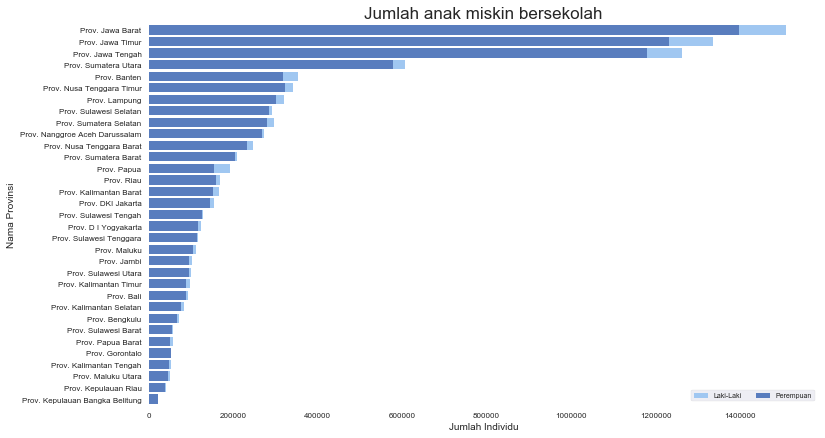

In [156]:
plt.figure(figsize = (12,7))
plt.style.use('seaborn-white')
sns.set_color_codes("pastel")
sns.barplot(a['Laki-Laki'],a.index,color = 'b',label = 'Laki-Laki')

sns.set_color_codes("muted")
sns.barplot(a['Perempuan'],a.index,color = 'b',label = 'Perempuan') 

sns.set(font_scale = 0.7)

plt.legend(ncol=2, loc="lower right", frameon=True)
plt.xlabel('Jumlah Individu',fontsize = 10)
plt.ylabel('Nama Provinsi',fontsize = 10)
plt.title('Jumlah anak miskin bersekolah',fontsize = 17)

sns.despine(left=True,bottom=True)
plt.savefig('gambar1.png',bbox_inches='tight',dpi=100)

# Jawa Barat memiliki jumlah terbanyak, kedua Jawa Timur, ketiga Jawa Tengah

# Pulau Jawa memiliki anak miskin dengan kesejahteraan 30% terbanyak

In [136]:
b = data.groupby(['jenis_kelamin'])['jumlah_individu'].sum()
c = data.groupby(['tingkat_pendidikan'])['jumlah_individu'].sum()

f = ['Tingkat Dasar','Tingkat Menengah','Tingkat Lanjut','Perguruan Tinggi']
g = [c['M. Ibtidaiyah']+c['SD/SDLB/Paket A'],c['M. Tsanawiyah']
     +c['SMPT/SMPLB/Paket B'],c['M. Aliyah']+c['SMA/SMK/SMALB/Paket C'],c['Perguruan Tinggi']]
h = pd.Series(dict(zip(f,g)))

In [148]:
h = np.sum(pd.concat([e['Tingkat Dasar'],e['Tingkat Menengah'],
               e['Tingkat Lanjut'],e['Perguruan Tinggi']],axis=1))

Tingkat Dasar       11633303
Tingkat Menengah     3957971
Tingkat Lanjut       1832444
Perguruan Tinggi      177305
dtype: int64

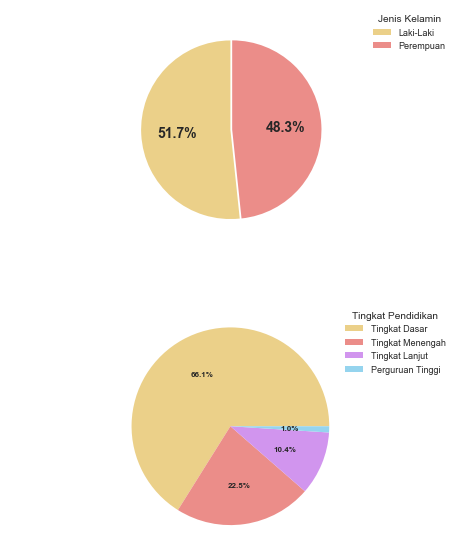

In [150]:
fig2, ax2 = plt.subplots(2,figsize = (8,10))
plt.style.use('seaborn-white')

ax2[0].axis('equal'); ax2[1].axis('equal')

colors = ['#EBD089','#EB8D89','#D195EE','#95D4EE','#9BE15D','#F7EF11','#E530CC']
#95D4EE  biru
#9BE15D  hijau 
#D195EE  ungu
#EBD089  coklat
#EB8D89  merah
#F7EF11  kuning

#Plot 1

wedges1,texts1, autotexts1 = ax2[0].pie(b,explode=[0,0.01],
                                       autopct='%1.1f%%',radius = 0.5,startangle = 90,
                                       colors = colors)

leg = ax2[0].legend(wedges1, list(b.index),loc=1,prop={'size':9})
leg.set_title( title="Jenis Kelamin",prop={'size':'large'})

plt.setp(autotexts1, size=14,weight = 'bold')


#Plot 2
wedges2,texts2,autotexts2 = ax2[1].pie(h, autopct='%1.1f%%',colors = colors)

leg2 = ax2[1].legend(wedges2, list(h.index),loc=1,prop={'size':9})
leg2.set_title(title = 'Tingkat Pendidikan',prop={'size':'large'})

plt.setp(autotexts2, size=8,weight = 'bold')
fig2.savefig('gambar2.png',bbox_inches='tight',dpi=100)

# Presentase tingkat pendidikan sekolah dasar paling tinggi ~66%

# Presentase tingkat pendidikan perguruan tinggi sangat rendah ~1%

In [137]:
d = data.pivot_table('jumlah_individu',index = 'nama_provinsi',aggfunc='sum')
d = d.sort_values(by = ['jumlah_individu'], ascending = False)
#aa = data.groupby(['tingkat_pendidikan'])['jumlah_individu'].sum()
#print(aa['M. Ibtidaiyah'] + aa['SD/SDLB/Paket A'])
#print(np.sum(e['Tingkat Dasar']))
#aa

In [138]:
e = data.pivot_table('jumlah_individu',index='nama_provinsi',columns = 'tingkat_pendidikan',aggfunc='sum')
e['Jumlah'] = e.sum(axis = 1) 
e['Tingkat Dasar'] = e['SD/SDLB/Paket A'] + e['M. Ibtidaiyah']
e['Tingkat Menengah'] = e['SMPT/SMPLB/Paket B'] + e['M. Tsanawiyah']
e['Tingkat Lanjut'] = e['M. Aliyah'] + e['SMA/SMK/SMALB/Paket C']

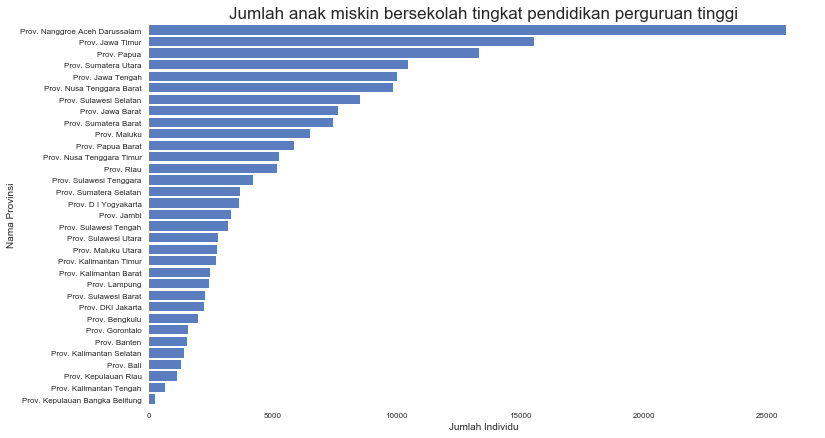

In [154]:
e = e.sort_values(by = 'Perguruan Tinggi',ascending = False)
plt.style.use('seaborn-white')

plt.figure(figsize = (12,7))

sns.set_color_codes("muted")
sns.barplot(e['Perguruan Tinggi'],e.index
            ,label = 'Perguruan Tinggi',color = 'b')


sns.set(font_scale = 0.8)
plt.xlabel('Jumlah Individu',fontsize = 10)
plt.ylabel('Nama Provinsi',fontsize = 10)
plt.title('Jumlah anak miskin bersekolah tingkat pendidikan perguruan tinggi',fontsize = 17)
sns.despine(left=True,bottom=True)
plt.savefig('gambar3.png',bbox_inches='tight',dpi=100)

# Prov. Nanggroe Aceh Darussalam memiliki siswa tingkat perguruan tinggi terbanyak

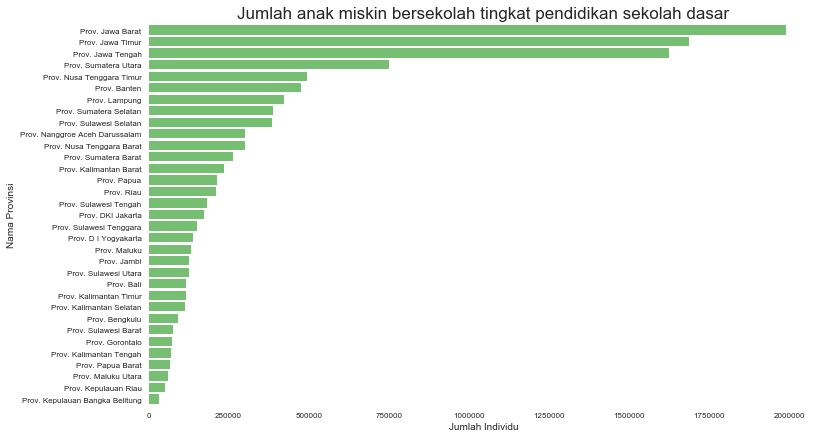

In [155]:
e = e.sort_values(by = 'Tingkat Dasar',ascending = False)
plt.style.use('seaborn-white')
plt.figure(figsize = (12,7))

sns.set_color_codes("muted")
sns.barplot(e['Tingkat Dasar'],e.index,color = 'g',label = 'Tingkat Dasar')

sns.set(font_scale = 0.8)
plt.xlabel('Jumlah Individu',fontsize =10 )
plt.ylabel('Nama Provinsi',fontsize =10 )

plt.title('Jumlah anak miskin bersekolah tingkat pendidikan sekolah dasar',fontsize = 17)
sns.despine(left=True,bottom=True)
plt.savefig('gambar4.png',bbox_inches='tight',dpi=100)

# Pada tingkat pendidikan sekolah dasar jumlah terbanyak di provinsi Jawa Barat, kedua Jawa Timur, ketiga Jawa Tengah

count       66.000000
mean      2686.439394
std       2687.789587
min        130.000000
25%       1065.250000
50%       1655.000000
75%       3455.000000
max      15650.000000
Name: jumlah_individu, dtype: float64

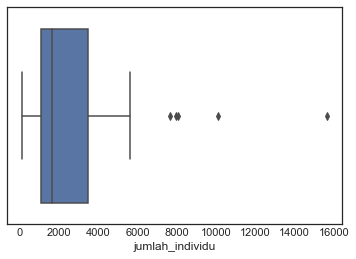

In [146]:
sns.boxplot(x= data.loc[data['tingkat_pendidikan'] == 'Perguruan Tinggi','jumlah_individu'])
data.loc[data['tingkat_pendidikan'] == 'Perguruan Tinggi','jumlah_individu'].describe()

count    3.300000e+01
mean     3.525243e+05
std      4.831848e+05
min      3.188400e+04
25%      1.132870e+05
50%      1.714730e+05
75%      3.846000e+05
max      1.990442e+06
Name: Tingkat Dasar, dtype: float64

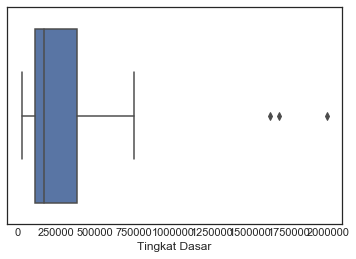

In [147]:
sns.boxplot(x= e['Tingkat Dasar'])
e['Tingkat Dasar'].describe()

In [198]:
data2 = pd.read_csv('data-putus-sekolah-sd-2008-2011.csv')
cc = data2.pivot_table(values = 'jumlah_putus_sekolah',index = 'nama_provinsi',columns='tahun')

#sns.barplot(x= cc.columns,y = cc.loc['Prov. Jawa Barat'])
#sns.barplot(x= cc.columns,y = cc.loc['Prov. Jawa Timur'])
cc.loc['Prov. Jawa Barat',2008]

Index(['Prov. Bali', 'Prov. Banten', 'Prov. Bengkulu', 'Prov. D I Yogyakarta',
       'Prov. DKI Jakarta', 'Prov. Gorontalo', 'Prov. Jambi',
       'Prov. Jawa Barat', 'Prov. Jawa Tengah', 'Prov. Jawa Timur',
       'Prov. Kalimantan Barat', 'Prov. Kalimantan Selatan',
       'Prov. Kalimantan Tengah', 'Prov. Kalimantan Timur',
       'Prov. Kepulauan Bangka Belitung', 'Prov. Kepulauan Riau',
       'Prov. Lampung', 'Prov. Maluku', 'Prov. Maluku Utara',
       'Prov. Nanggroe Aceh Darussalam', 'Prov. Nusa Tenggara Barat',
       'Prov. Nusa Tenggara Timur', 'Prov. Papua', 'Prov. Papua Barat',
       'Prov. Riau', 'Prov. Sulawesi Barat', 'Prov. Sulawesi Selatan',
       'Prov. Sulawesi Tengah', 'Prov. Sulawesi Tenggara',
       'Prov. Sulawesi Utara', 'Prov. Sumatera Barat',
       'Prov. Sumatera Selatan', 'Prov. Sumatera Utara'],
      dtype='object', name='nama_provinsi')

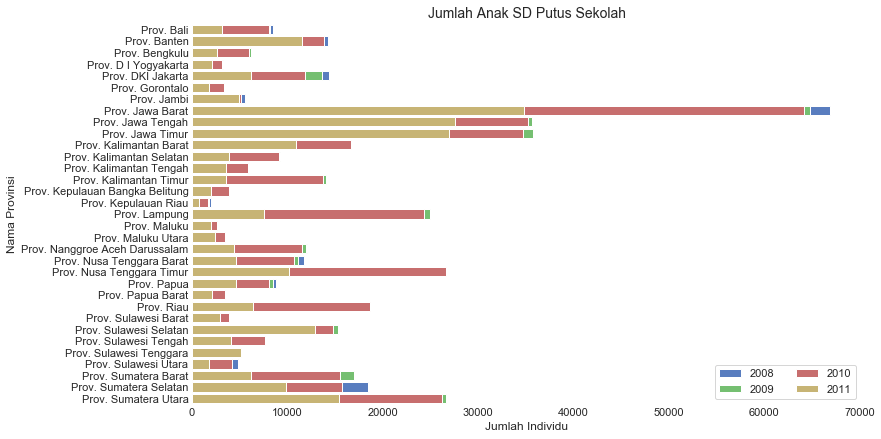

In [212]:
plt.figure(figsize = (12,7))
plt.style.use('seaborn-white')
sns.set_color_codes("muted")
color = ['b','g','r','y'] 
n = 0
for i in cc.columns:
    sns.barplot(cc.loc[:,i],cc.index,label = i,color = color[n])
    n+=1

plt.legend(ncol=2, loc="lower right", frameon=True)
plt.xlabel('Jumlah Individu')
plt.ylabel('Nama Provinsi')
plt.title('Jumlah Anak SD Putus Sekolah',fontsize = 14)
sns.despine(left=True,bottom=True)
plt.savefig('gambar5.png',bbox_inches='tight',dpi=100)